# Logistic Regression: Banking Marketing Campaign

## 1. Data loading

In [46]:
# Handle imports upfront
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

pd.set_option('display.max_columns', None)

### 1.1. Load

In [2]:
data_url='https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv'
data_df=pd.read_csv(data_url, sep=';')



### 1.2. Inspect

In [3]:
# Your code here....
data_df.head(21)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
data_df.shape
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### 1.3. Train-test split

In [5]:
# First separate the features from the labels
labels=data_df['y']
features=data_df.drop('y', axis=1)

# Do the test-train split
training_features, testing_features, training_labels, testing_labels=train_test_split(
    features,
    labels,
    test_size=0.25, 
    random_state=315
)

## 2. EDA

### 2.1. Baseline model performance

In [6]:
# Your code here... Think about this: what would the result be if we randomly guessed yes or no for each example? How about if we always guessed yes or always guessed no?
print(training_features.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64


In [7]:
print(training_features.describe())

                age      duration      campaign         pdays      previous  \
count  30891.000000  30891.000000  30891.000000  30891.000000  30891.000000   
mean      40.084555    257.957949      2.578486    962.743291      0.171118   
std       10.448494    258.889559      2.799670    186.244139      0.491411   
min       17.000000      0.000000      1.000000      0.000000      0.000000   
25%       32.000000    102.000000      1.000000    999.000000      0.000000   
50%       38.000000    179.000000      2.000000    999.000000      0.000000   
75%       47.000000    321.000000      3.000000    999.000000      0.000000   
max       98.000000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  30891.000000    30891.000000   30891.000000  30891.000000  30891.000000  
mean       0.087155       93.576596     -40.480379      3.629877   5167.396782  
std        1.569781        0.579307       4.6

In [8]:
training_features.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1439
campaign            41
pdays               25
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          311
nr.employed         11
dtype: int64

In [9]:
training_features.value_counts()

age  job          marital   education            default  housing  loan  contact    month  day_of_week  duration  campaign  pdays  previous  poutcome     emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed
71   retired      single    university.degree    no       no       no    telephone  oct    tue          120       1         999    0         nonexistent  -3.4          92.431          -26.9          0.742      5017.5         2
39   admin.       married   university.degree    no       no       no    cellular   nov    tue          123       2         999    0         nonexistent  -0.1          93.200          -42.0          4.153      5195.8         2
47   technician   divorced  high.school          no       yes      no    cellular   jul    thu          43        3         999    0         nonexistent   1.4          93.918          -42.7          4.962      5228.1         2
45   admin.       married   university.degree    no       no       no    cellular   jul    thu   

In [10]:
training_labels.value_counts()

y
no     27441
yes     3450
Name: count, dtype: int64

In [11]:
data_df[['y', 'housing']].value_counts()

y    housing
no   yes        19069
     no         16596
yes  yes         2507
     no          2026
no   unknown      883
yes  unknown      107
Name: count, dtype: int64

In [12]:
data_df[['y', 'education']].value_counts()

y    education          
no   university.degree      10498
     high.school             8484
     basic.9y                5572
     professional.course     4648
     basic.4y                3748
     basic.6y                2104
yes  university.degree       1670
no   unknown                 1480
yes  high.school             1031
     professional.course      595
     basic.9y                 473
     basic.4y                 428
     unknown                  251
     basic.6y                 188
no   illiterate                14
yes  illiterate                 4
Name: count, dtype: int64

In [13]:
data_df[['y', 'marital']].value_counts()

y    marital 
no   married     22396
     single       9948
     divorced     4136
yes  married      2532
     single       1620
     divorced      476
no   unknown        68
yes  unknown        12
Name: count, dtype: int64

In [14]:
data_df[['y', 'job']].value_counts()

y    job          
no   admin.           9070
     blue-collar      8616
     technician       6013
     services         3646
     management       2596
yes  admin.           1352
no   entrepreneur     1332
     retired          1286
     self-employed    1272
     housemaid         954
     unemployed        870
yes  technician        730
     blue-collar       638
no   student           600
yes  retired           434
     management        328
     services          323
no   unknown           293
yes  student           275
     self-employed     149
     unemployed        144
     entrepreneur      124
     housemaid         106
     unknown            37
Name: count, dtype: int64

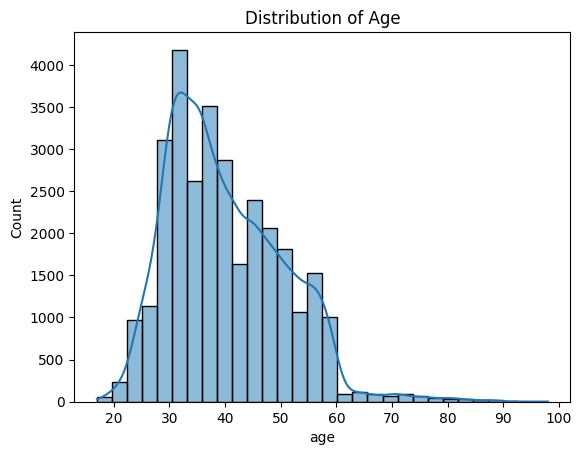

In [15]:
sns.histplot(training_features['age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.show()

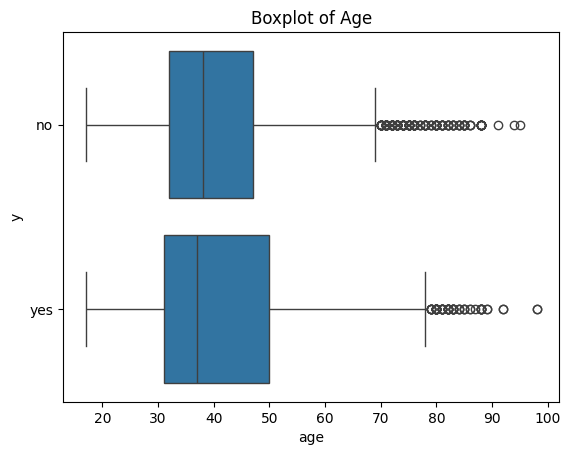

In [16]:
sns.boxplot(x=training_features['age'], y=training_labels)
plt.title('Boxplot of Age')
plt.show()

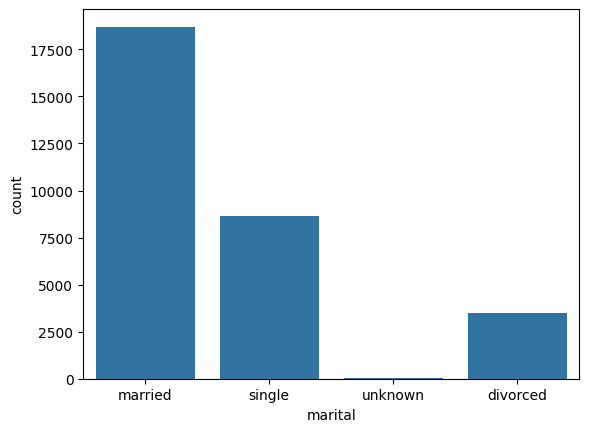

In [17]:
sns.countplot(x='marital', data=training_features)
plt.show()


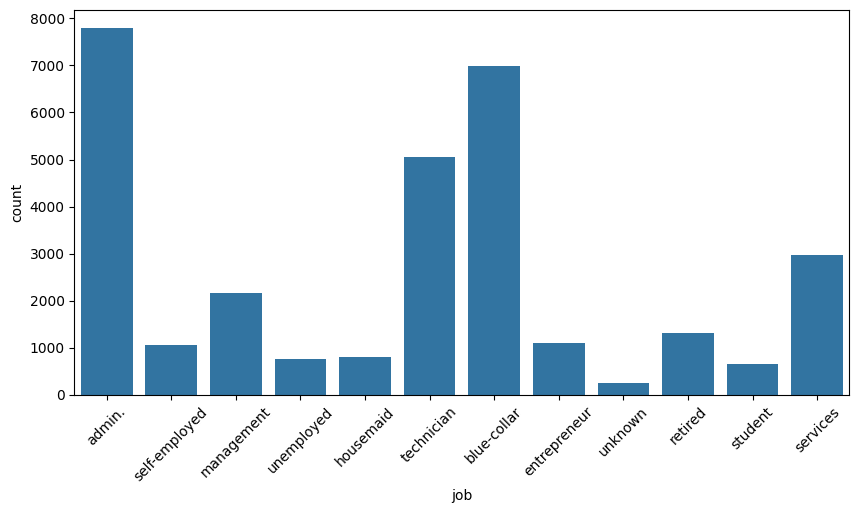

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(x=training_features['job'])
plt.xticks(rotation=45)
plt.show()

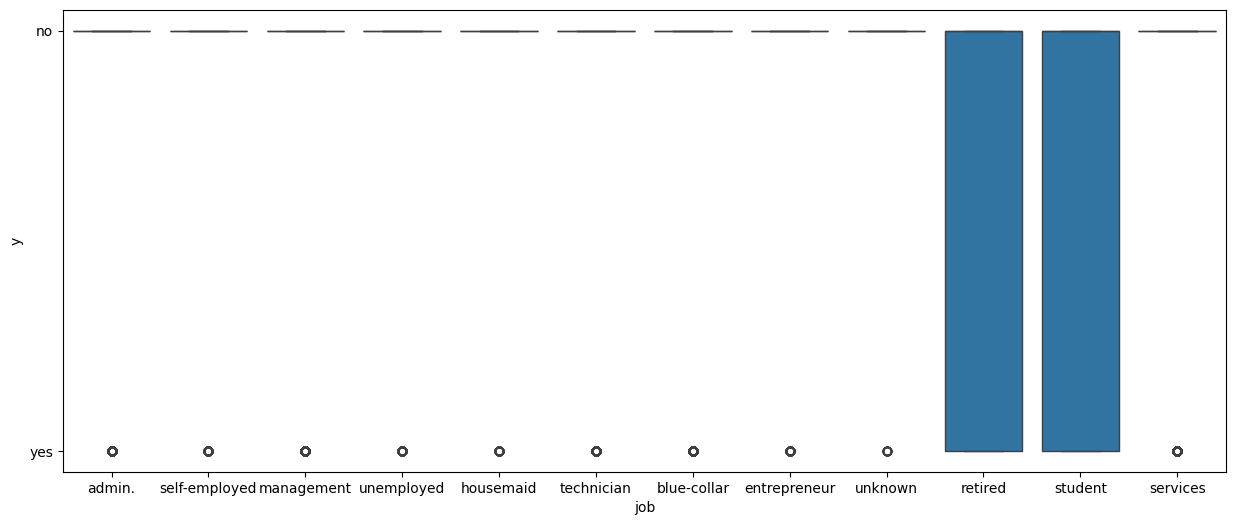

In [19]:
plt.figure(figsize=(15, 6))
sns.boxplot(x=training_features['job'], y=training_labels)
plt.show()

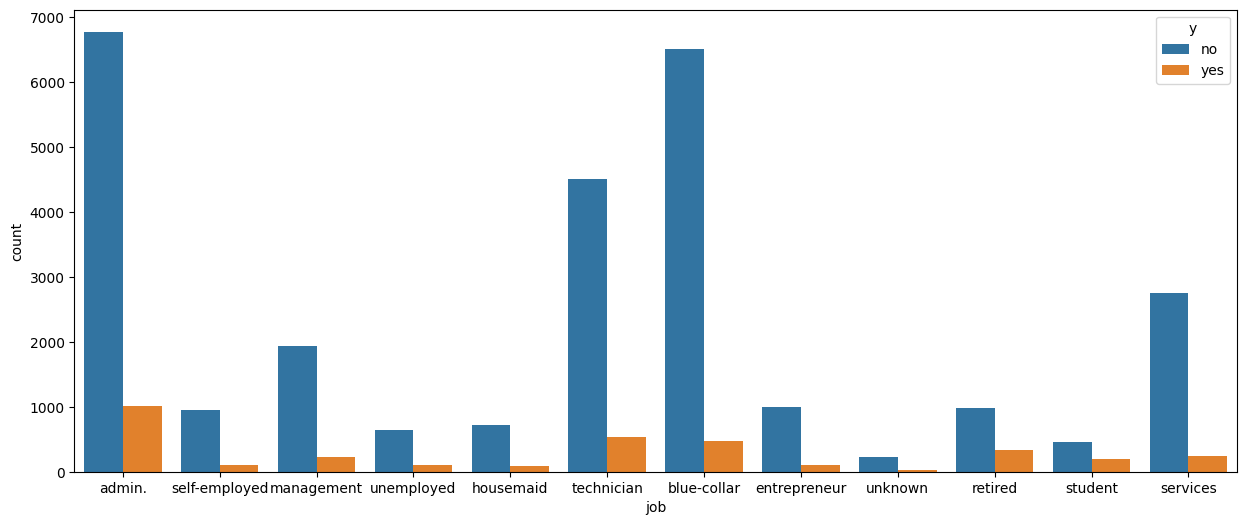

In [20]:
plt.figure(figsize=(15, 6))
sns.countplot(x=training_features['job'], hue=training_labels)
plt.show()


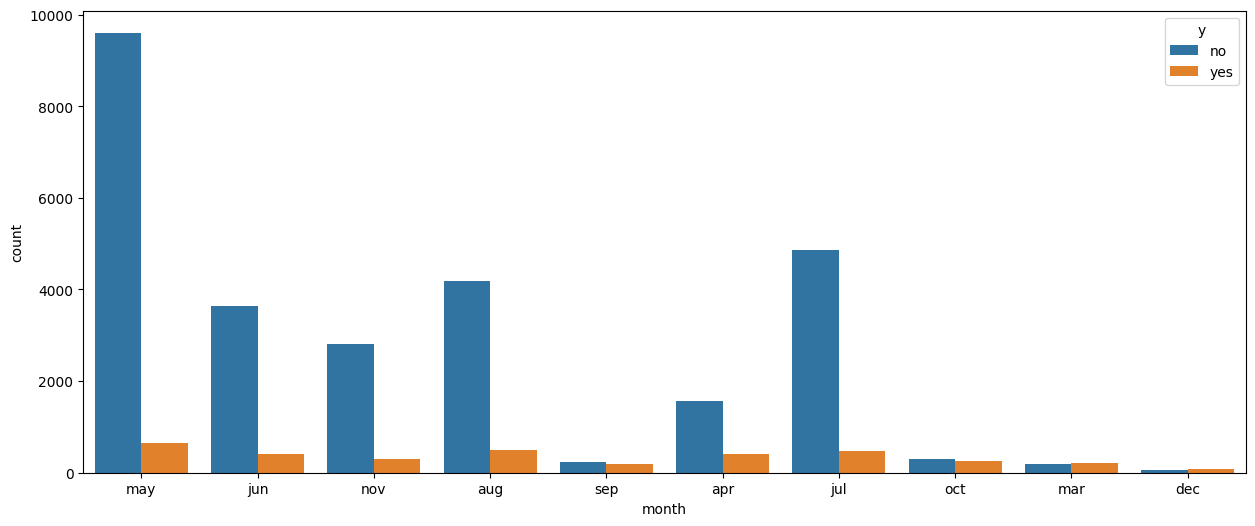

In [21]:
plt.figure(figsize=(15, 6))
sns.countplot(x=training_features['month'], hue=training_labels)
plt.show()

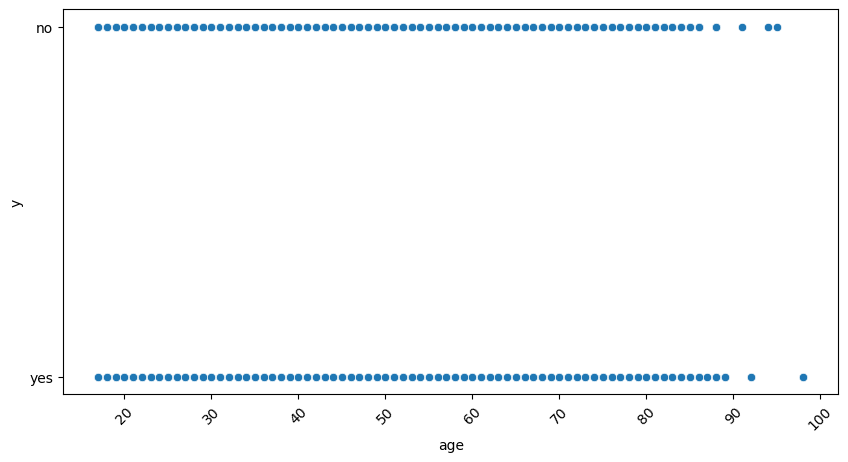

In [22]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=training_features['age'], y=training_labels)
plt.xticks(rotation=45)
plt.show()

### 2.2. Data composition & cleaning

In [23]:
# Your code here...
print(training_features['age'].unique())

[31 28 58 49 35 32 51 50 38 30 44 34 36 63 54 55 52 41 61 39 65 42 48 47
 53 26 24 37 45 46 43 33 25 40 57 56 60 27 29 62 92 59 23 66 84 22 78 19
 86 71 69 73 20 21 76 64 80 72 81 18 74 88 67 77 75 94 70 83 79 68 91 82
 85 89 17 98 87 95]


In [24]:
print(training_features['job'].unique())

['admin.' 'self-employed' 'management' 'unemployed' 'housemaid'
 'technician' 'blue-collar' 'entrepreneur' 'unknown' 'retired' 'student'
 'services']


In [25]:
print(training_features['marital'].unique())

['married' 'single' 'unknown' 'divorced']


In [26]:
print(training_features['education'].unique())

['high.school' 'university.degree' 'basic.4y' 'professional.course'
 'basic.9y' 'basic.6y' 'unknown' 'illiterate']


In [27]:
print(training_features['month'].unique())

['may' 'jun' 'nov' 'aug' 'sep' 'apr' 'jul' 'oct' 'mar' 'dec']


In [28]:
print(training_features['housing'].unique())

['yes' 'no' 'unknown']


### 2.3. Feature interactions & selection

In [29]:
from sklearn.preprocessing import OneHotEncoder

# Names of columns we want to encode
encoded_columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'day_of_week', 'poutcome']

# Do the encoding
# training_features=pd.get_dummies(training_features, columns=encoded_columns, dtype=int, drop_first=True)
# testing_features=pd.get_dummies(testing_features, columns=encoded_columns, dtype=int, drop_first=True)

hot_encoded=OneHotEncoder(sparse_output=False).fit(training_features[encoded_columns])

training_features_encoded=hot_encoded.transform(training_features[encoded_columns])
testing_features_encoded=hot_encoded.transform(testing_features[encoded_columns])

training_features_encoded=pd.DataFrame(
    training_features_encoded,
    columns=hot_encoded.get_feature_names_out()
)

testing_features_encoded=pd.DataFrame(
    testing_features_encoded,
    columns=hot_encoded.get_feature_names_out()
)

training_features.drop(encoded_columns, inplace=True, axis=1)
training_features=pd.concat([training_features.reset_index(drop=True), training_features_encoded.reset_index(drop=True)], axis=1)

testing_features.drop(encoded_columns, inplace=True, axis=1)
testing_features=pd.concat([testing_features.reset_index(drop=True), testing_features_encoded.reset_index(drop=True)], axis=1)


# training_features.info()
training_features_encoded.shape




(30891, 41)

In [30]:
testing_features_encoded.shape

(10297, 41)

In [31]:
training_features['contact'] = training_features['contact'].map({'cellular': 1, 'telephone': 0})
training_features['month'] = training_features['month'].map({'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12})

testing_features['contact'] = testing_features['contact'].map({'cellular': 1, 'telephone': 0})
testing_features['month'] = testing_features['month'].map({'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12})

print(training_features.dtypes)


age                                int64
contact                            int64
month                              int64
duration                           int64
campaign                           int64
pdays                              int64
previous                           int64
emp.var.rate                     float64
cons.price.idx                   float64
cons.conf.idx                    float64
euribor3m                        float64
nr.employed                      float64
job_admin.                       float64
job_blue-collar                  float64
job_entrepreneur                 float64
job_housemaid                    float64
job_management                   float64
job_retired                      float64
job_self-employed                float64
job_services                     float64
job_student                      float64
job_technician                   float64
job_unemployed                   float64
job_unknown                      float64
marital_divorced

In [32]:
# Your code here...
training_features['age_campaign'] = training_features['age'] * training_features['campaign']
training_features['duration_pdays'] = training_features['duration'] * training_features['pdays']
training_features['campaign_per_previous'] =training_features['campaign'] / (training_features['previous'] + 1)

testing_features['age_campaign'] = testing_features['age'] * testing_features['campaign']
testing_features['duration_pdays'] = testing_features['duration'] * testing_features['pdays']
testing_features['campaign_per_previous'] =testing_features['campaign'] / (testing_features['previous'] + 1)

training_features.head()

,age,contact,month,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,age_campaign,duration_pdays,campaign_per_previous
0,31,1,5,14,1,999,0,-1.8,92.893,-46.2,1.281,5099.1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,31,13986,1.0
1,28,1,5,315,1,999,0,-1.8,92.893,-46.2,1.264,5099.1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,28,314685,1.0
2,58,1,6,86,1,999,0,-2.9,92.963,-40.8,1.260,5076.2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,58,85914,1.0
3,49,1,11,73,1,999,0,-0.1,93.200,-42.0,4.076,5195.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,49,72927,1.0
4,35,1,11,360,2,999,0,-0.1,93.200,-42.0,4.021,5195.8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,70,359640,2.0


In [33]:
corr_matrix = training_features.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column]> 0.9)]

training_features.drop(columns=to_drop, inplace=True)
testing_features.drop(columns=to_drop, inplace=True) 

In [34]:

# Scale the features
standard_scaler=StandardScaler().fit(training_features)

training_features=standard_scaler.transform(training_features)
testing_features=standard_scaler.transform(testing_features)

In [35]:
# Last, encode the labels
label_encoder=LabelEncoder().fit(training_labels)
training_labels=label_encoder.transform(training_labels)
testing_labels=label_encoder.transform(testing_labels)

In [36]:
print(data_df['y'].value_counts(normalize=True))

y
no     0.887346
yes    0.112654
Name: proportion, dtype: float64


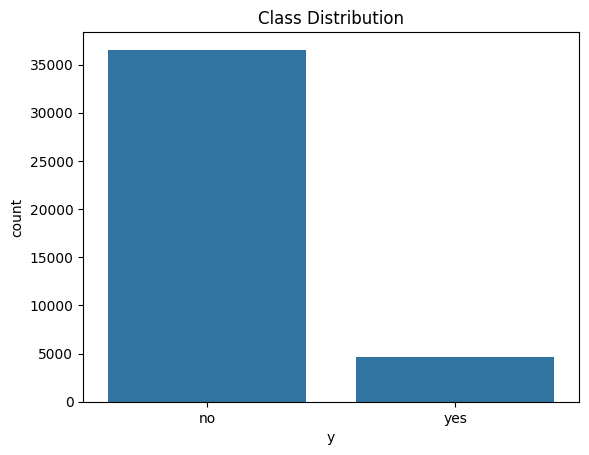

In [37]:
sns.countplot(x=data_df['y'])
plt.title("Class Distribution")
plt.show()

## 3. Model training

In [38]:
from sklearn.metrics import log_loss 
from imblearn.under_sampling import RandomUnderSampler

# Oversampling (For Small Minority Class)
smote = SMOTE(random_state=42)
training_features_resampled, training_labels_resampled = smote.fit_resample(training_features, training_labels)

# Undersampling (For Large Majority Class)
# rus = RandomUnderSampler(random_state=42)
# training_features_resampled, training_labels_resampled = rus.fit_resample(training_features, training_labels)




In [39]:
# Your code here...
# log_model = LogisticRegression(class_weight='balanced')
# log_model.fit(training_features, training_labels)

log_model = LogisticRegression(random_state=42)
log_model.fit(training_features_resampled, training_labels_resampled)

prediction = log_model.predict(testing_features)
print("Accuracy:", accuracy_score(testing_labels, prediction))
print("Log Loss Results :", log_loss(testing_labels, prediction))
print(classification_report(testing_labels, prediction))

Accuracy: 0.8577255511313975
Log Loss Results : 5.12809092114758
              precision    recall  f1-score   support

           0       0.98      0.86      0.91      9107
           1       0.44      0.85      0.58      1190

    accuracy                           0.86     10297
   macro avg       0.71      0.85      0.75     10297
weighted avg       0.92      0.86      0.88     10297



## 4. Model optimization

### 4.1. Model tuning

In [43]:
# Your code here...
hypr_params = [
    {
        'C': [0.001, 0.01, 0.1, 0.25, 0.5], 
        'solver': ['lbfgs'],
        'penalty': ['l2'],
        'max_iter': [2, 5, 10]
    },
    {
        'C': [0.001, 0.01, 0.1, 0.25, 0.5], 
        'solver': ['saga'],
        'penalty': ['l1', 'l2', 'elasticnet'],
        'max_iter': [2, 5, 10]
    },
    {
        'C': [0.001, 0.01, 0.1, 0.25, 0.5], 
        'solver': ['liblinear'],
        'penalty': ['l1', 'l2'],
        'max_iter': [2, 5, 10]
    }
]

logModel = LogisticRegression(random_state=42)

grid_search = GridSearchCV(logModel, hypr_params, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(training_features_resampled, training_labels_resampled)
bestParams = grid_search.best_params_
print("Best Parameters: ", bestParams)


best_log_model = grid_search.best_estimator_
best_log_model.fit(training_features_resampled, training_labels_resampled)

bestPredictions = best_log_model.predict(testing_features)

print("Accuracy: ", accuracy_score(testing_labels, bestPredictions))
print("Log Loss Results: ", log_loss(testing_labels, bestPredictions))
print(classification_report(testing_labels, bestPredictions))

/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

Best Parameters:  {'C': 0.5, 'max_iter': 10, 'penalty': 'l1', 'solver': 'saga'}
Accuracy:  0.8583082451199379
Log Loss Results:  5.107088500992709
              precision    recall  f1-score   support

           0       0.98      0.86      0.91      9107
           1       0.44      0.85      0.58      1190

    accuracy                           0.86     10297
   macro avg       0.71      0.86      0.75     10297
weighted avg       0.92      0.86      0.88     10297



/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


### 4.2. Model optimization

In [45]:
bestModel = LogisticRegression(**bestParams)
bestModel.fit(training_features_resampled, training_labels_resampled)

testOptimized = bestModel.predict(testing_features)

print("Accuracy:", accuracy_score(testing_labels, testOptimized))
print("Log Loss Results :", log_loss(testing_labels, testOptimized))
print(classification_report(testing_labels, testOptimized))

Accuracy: 0.8583082451199379
Log Loss Results : 5.107088500992709
              precision    recall  f1-score   support

           0       0.98      0.86      0.91      9107
           1       0.44      0.85      0.58      1190

    accuracy                           0.86     10297
   macro avg       0.71      0.86      0.75     10297
weighted avg       0.92      0.86      0.88     10297



/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


### 4.3. Final model evaluation

In [47]:
# Your code here...
print(classification_report(testing_labels, testOptimized))

print("Confusion Matrix:\n", confusion_matrix(testing_labels, testOptimized))

              precision    recall  f1-score   support

           0       0.98      0.86      0.91      9107
           1       0.44      0.85      0.58      1190

    accuracy                           0.86     10297
   macro avg       0.71      0.86      0.75     10297
weighted avg       0.92      0.86      0.88     10297

Confusion Matrix:
 [[7823 1284]
 [ 175 1015]]
